# Install Dependencies

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=eb499fc7a987cbc919fb17c936e46a219ae323d8113ae2950f9d59b4a31ec039
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [2]:
!pip install kneed

# Import Libraries

In [3]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Statistics
from scipy.stats import pearsonr
from statsmodels.graphics.gofplots import qqplot

# Clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator

# Sklearn Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

# Warnings
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

# Data Information

The dataset selected for this project represents Breast Cancer from the Wisconsin Breast Cancer Database.


It contains data of 357 benign and 212 malignant cancers.


[Link](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) to database.


# Import Data

In [4]:
df = pd.read_csv("/content/data.csv")

In [5]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

Columns Information:

- id

- diagnosis (M = malignant, B = benign)


Ten real-valued features are computed for each cell nucleus:

  * **radius** (mean of distances from center to points on the perimeter)
  * **texture** (standard deviation of gray-scale value
  * **perimeter**
  * **area**
  * **smoothness** (local variation in radius length)
  * **compactness** (perimeter^2 / a - 1.0)
  * **concavity** (severity of concave portions of the contour)
  * **concave points** (number of concave portions  contour)
  * **symmetry**
  * **fractal dimension** ("coastline approximation" - 1)


The **mean**, **standard error** and **worst** or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# EDA

Before making data cleansing and feature selection, feature extraction and classification, a preliminary analysis will be done. The idea is to identify correlations, outliers and the need to perform normalization or standarization. For that we will perform some visualizations.

## Missing Values

In [7]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

## Drop Columns

In [8]:
# Remove unnecesary columns

dropped_columns = ['Unnamed: 32','id']

df = df.drop(dropped_columns,axis = 1 )
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

## Duplicates

In [9]:
# Check for duplicates
print(f"Number of duplicated rows = {df.duplicated().sum()}")

Number of duplicated rows = 0


## Select Target

In [10]:
# Select features
X = df.drop("diagnosis",axis = 1 )
y = df.diagnosis

X.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

## Count Plot

The counplot helps to visualize the number of values in the target.

Number of Benign:  357
Number of Malignant :  212


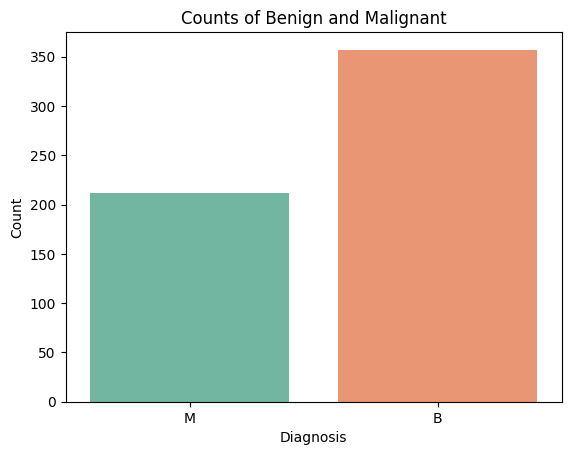

In [11]:
# Create a countplot with vertical bars and 'y' as the main category
ax = sns.countplot(x=y, palette="Set2")
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Counts of Benign and Malignant')

# Count occurrences of each category
B = sum(1 for i in y if i == 'B')
M = sum(1 for i in y if i == 'M')

print('Number of Benign: ',B)
print('Number of Malignant : ',M)

plt.show()


## Feature Distribution

In a first step we will scale the features with the StandardScaler in order to visualize them.

### Violin Plot

A good way to visualize the distribution of the features is using the violinplot. It shows the distribution of data points after grouping by one (or more) variables.

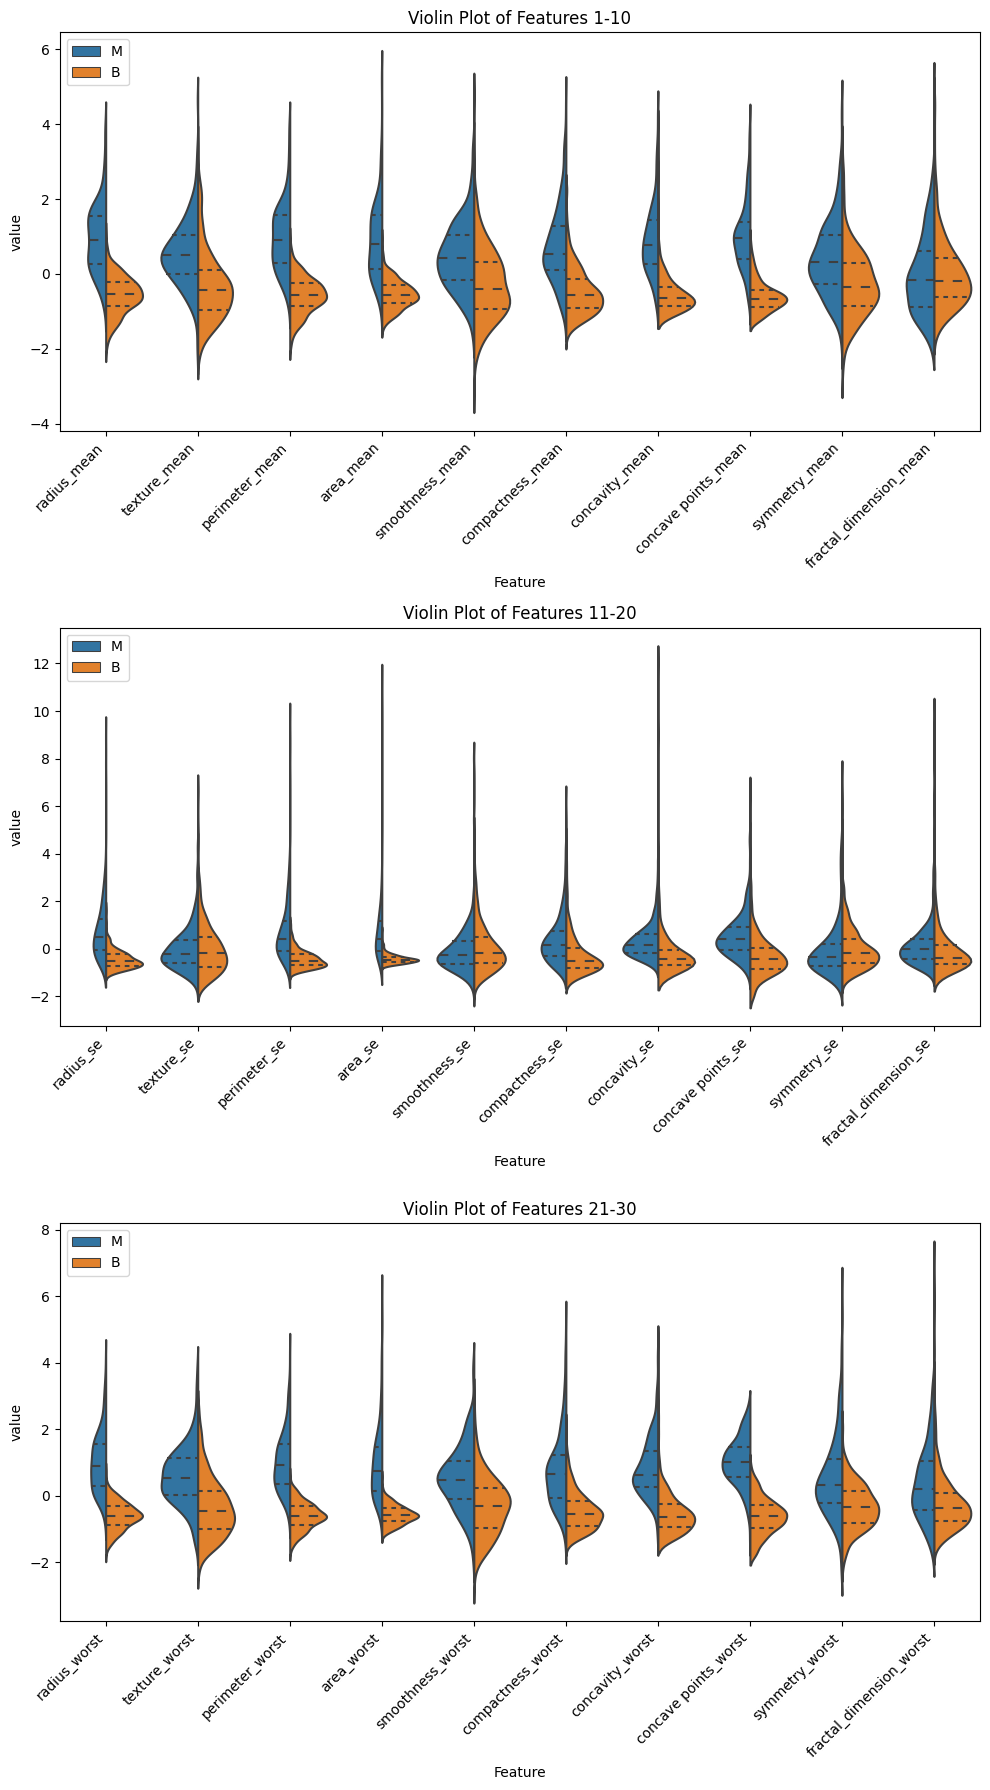

In [12]:
# Violinplot of the complete feature, sepatated into Benign and Malignant

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)

# Adding a 'diagnosis' column containing 'M' or 'B' values
scaled_df['diagnosis'] = y

# Dividing the features into three sets for subplots
features_1 = scaled_df.columns[:10]
features_2 = scaled_df.columns[10:20]
features_3 = scaled_df.columns[20:]

# Creating subplots for M and B categories separately
plt.figure(figsize=(10, 18))

for i, features in enumerate([features_1, features_2, features_3], start=1):
    plt.subplot(3, 1, i)
    data_to_plot = pd.melt(scaled_df, id_vars='diagnosis', value_vars=features, var_name='Feature')
    sns.violinplot(x='Feature', y='value', hue='diagnosis', data=data_to_plot, split=True, inner="quart")
    plt.title(f'Violin Plot of Features {i * 10 - 9}-{i * 10}')
    plt.legend(loc='upper left')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

It can be seen that some features like **concavity_mean** are well separated, which is good for classification purposes. Others like **symmetry_worst** are not separated, as the distribution of Benign and Malignant is similar.

### Swarm Plot

Another way to visualize the distribution of the features is using the swarmplot. It draw a categorical scatterplot with points adjusted to be non-overlapping. . This gives a better representation of the distribution of values, but it does not scale well to large numbers of observation”.

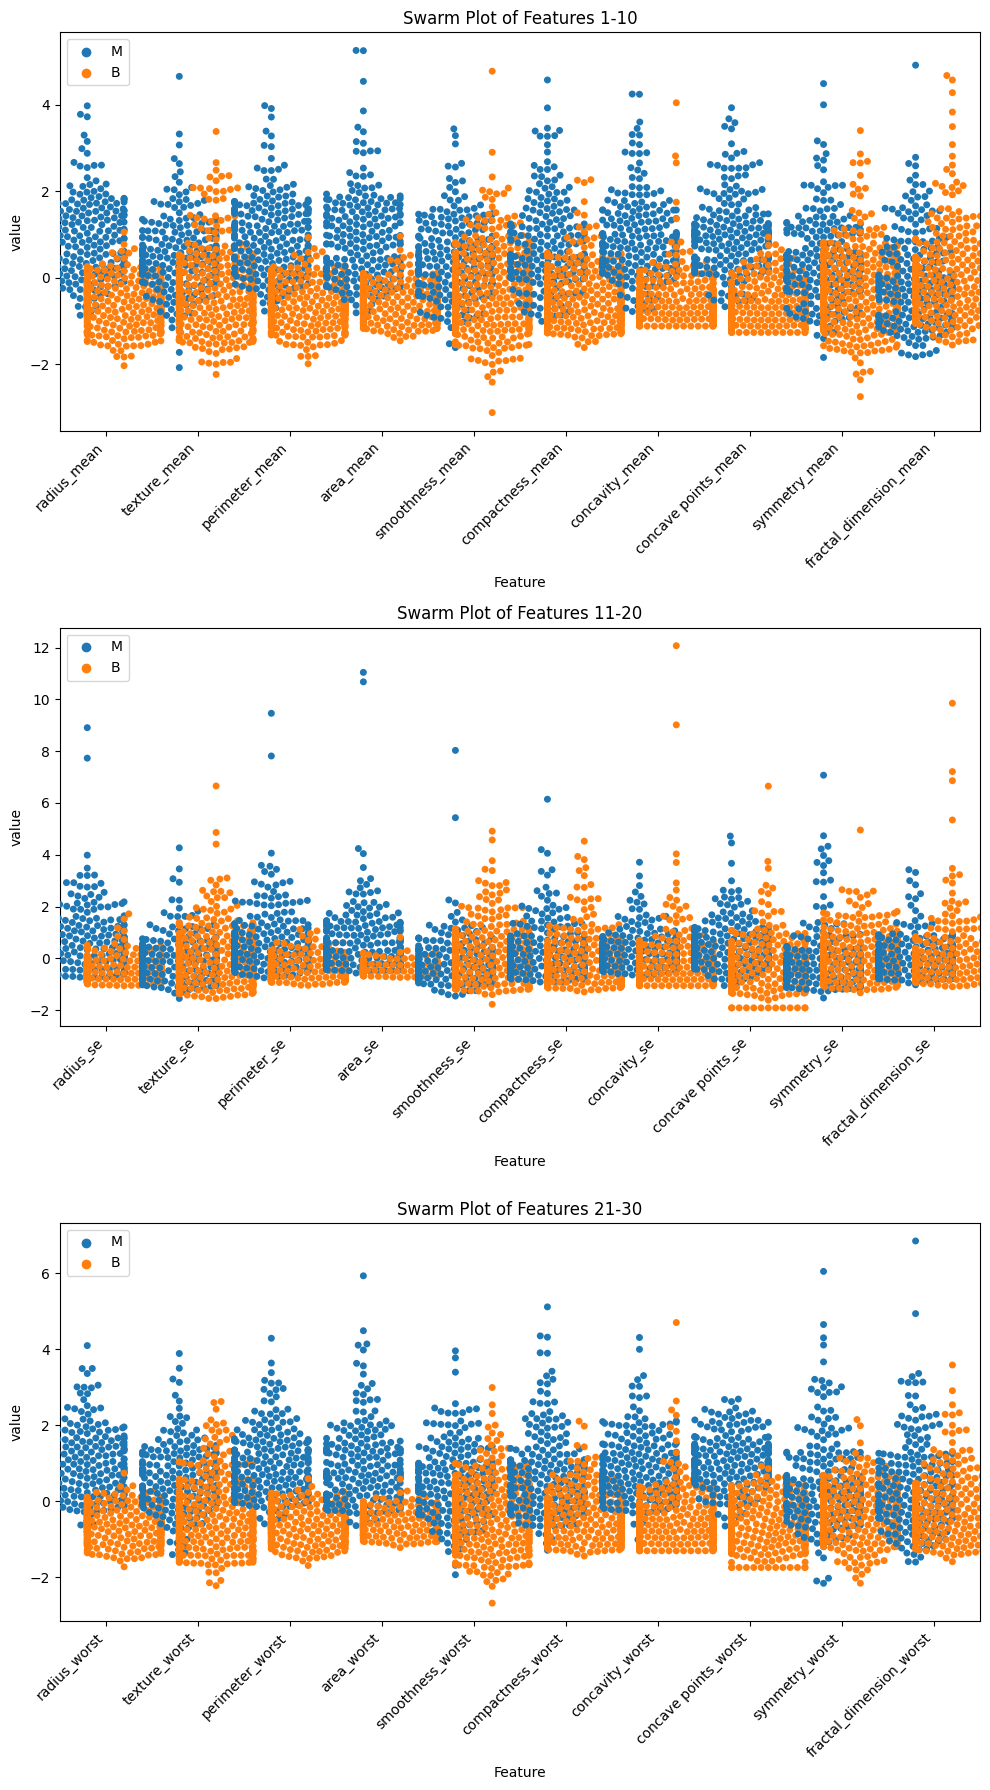

In [13]:
# Violinplot of the complete feature, sepatated into Benign and Malignant

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)

# Adding a 'diagnosis' column containing 'M' or 'B' values
scaled_df['diagnosis'] = y

# Dividing the features into three sets for subplots
features_1 = scaled_df.columns[:10]
features_2 = scaled_df.columns[10:20]
features_3 = scaled_df.columns[20:]

# Creating subplots for M and B categories separately
plt.figure(figsize=(10, 18))

for i, features in enumerate([features_1, features_2, features_3], start=1):
    plt.subplot(3, 1, i)
    data_to_plot = pd.melt(scaled_df, id_vars='diagnosis', value_vars=features, var_name='Feature')
    sns.swarmplot(x='Feature', y='value', hue='diagnosis', data=data_to_plot, dodge=True)
    plt.title(f'Swarm Plot of Features {i * 10 - 9}-{i * 10}')
    plt.legend(loc='upper left')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Here we can visualize a bit better the separation of **concavity_mean** and **symmetry_worst**.

## Outliers

In order to visualize the outliers, we can plot a boxplot. We can also separate the boxplots into Benign and Malignant.

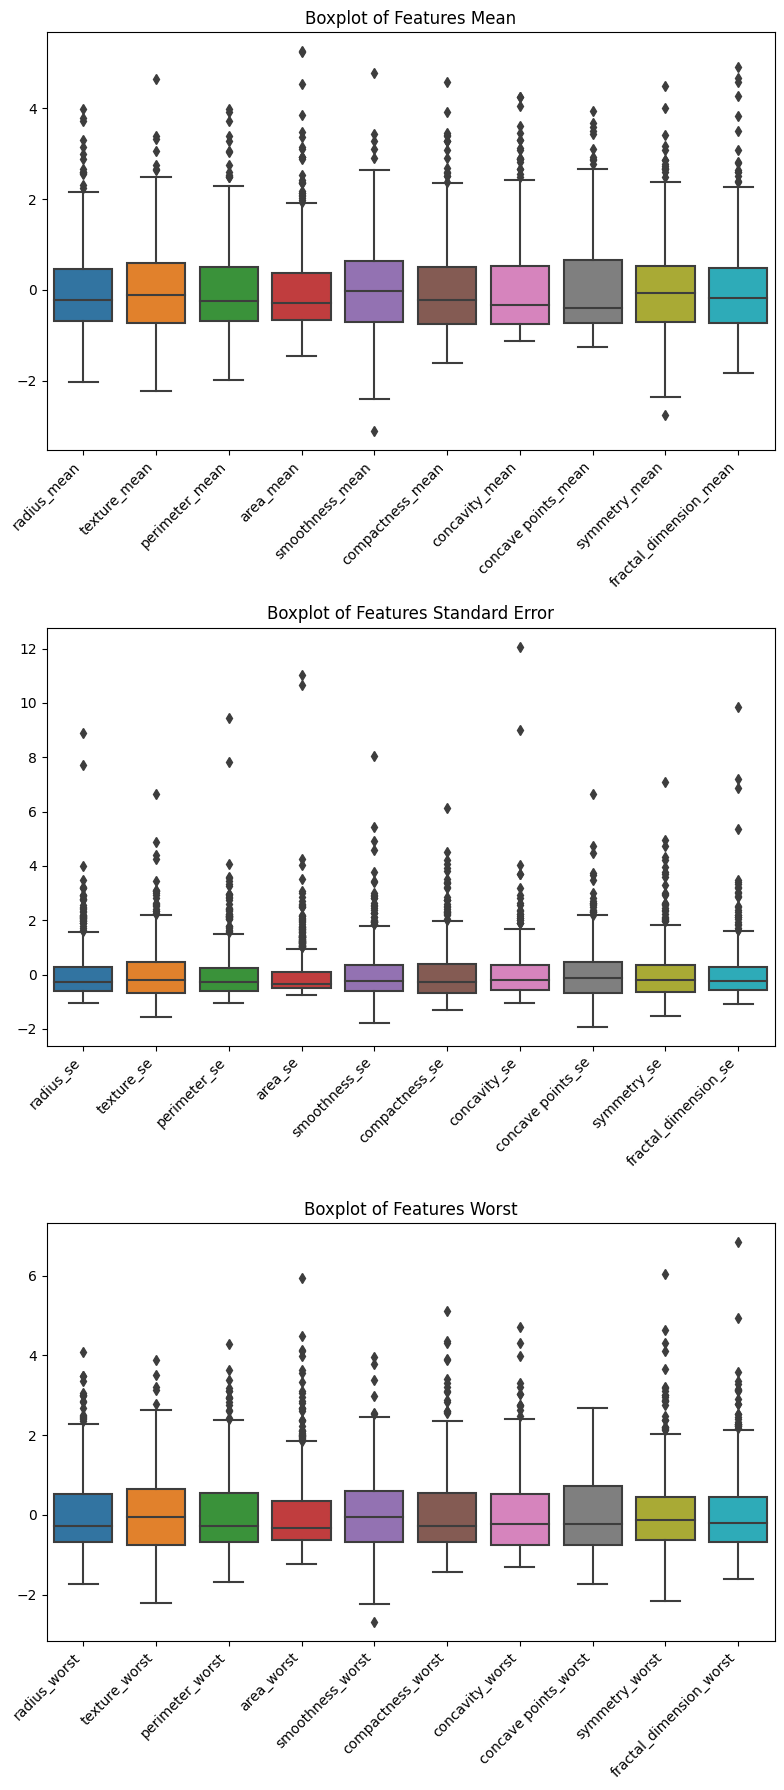

In [14]:
# Boxplot of the complete feature

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame with column names
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)

# Dividing the features into three sets for subplots
features_1 = scaled_df.columns[:10]
features_2 = scaled_df.columns[10:20]
features_3 = scaled_df.columns[20:]

plt.figure(figsize=(8, 18))

# Creating the first subplot for features Mean
plt.subplot(3, 1, 1)
sns.boxplot(data=scaled_df[features_1])
plt.title('Boxplot of Features Mean')
plt.xticks(rotation=45, ha='right')

# Creating the second subplot for features Standard Error
plt.subplot(3, 1, 2)
sns.boxplot(data=scaled_df[features_2])
plt.title('Boxplot of Features Standard Error')
plt.xticks(rotation=45, ha='right')

# Creating the third subplot for features Worst
plt.subplot(3, 1, 3)
sns.boxplot(data=scaled_df[features_3])
plt.title('Boxplot of Features Worst')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

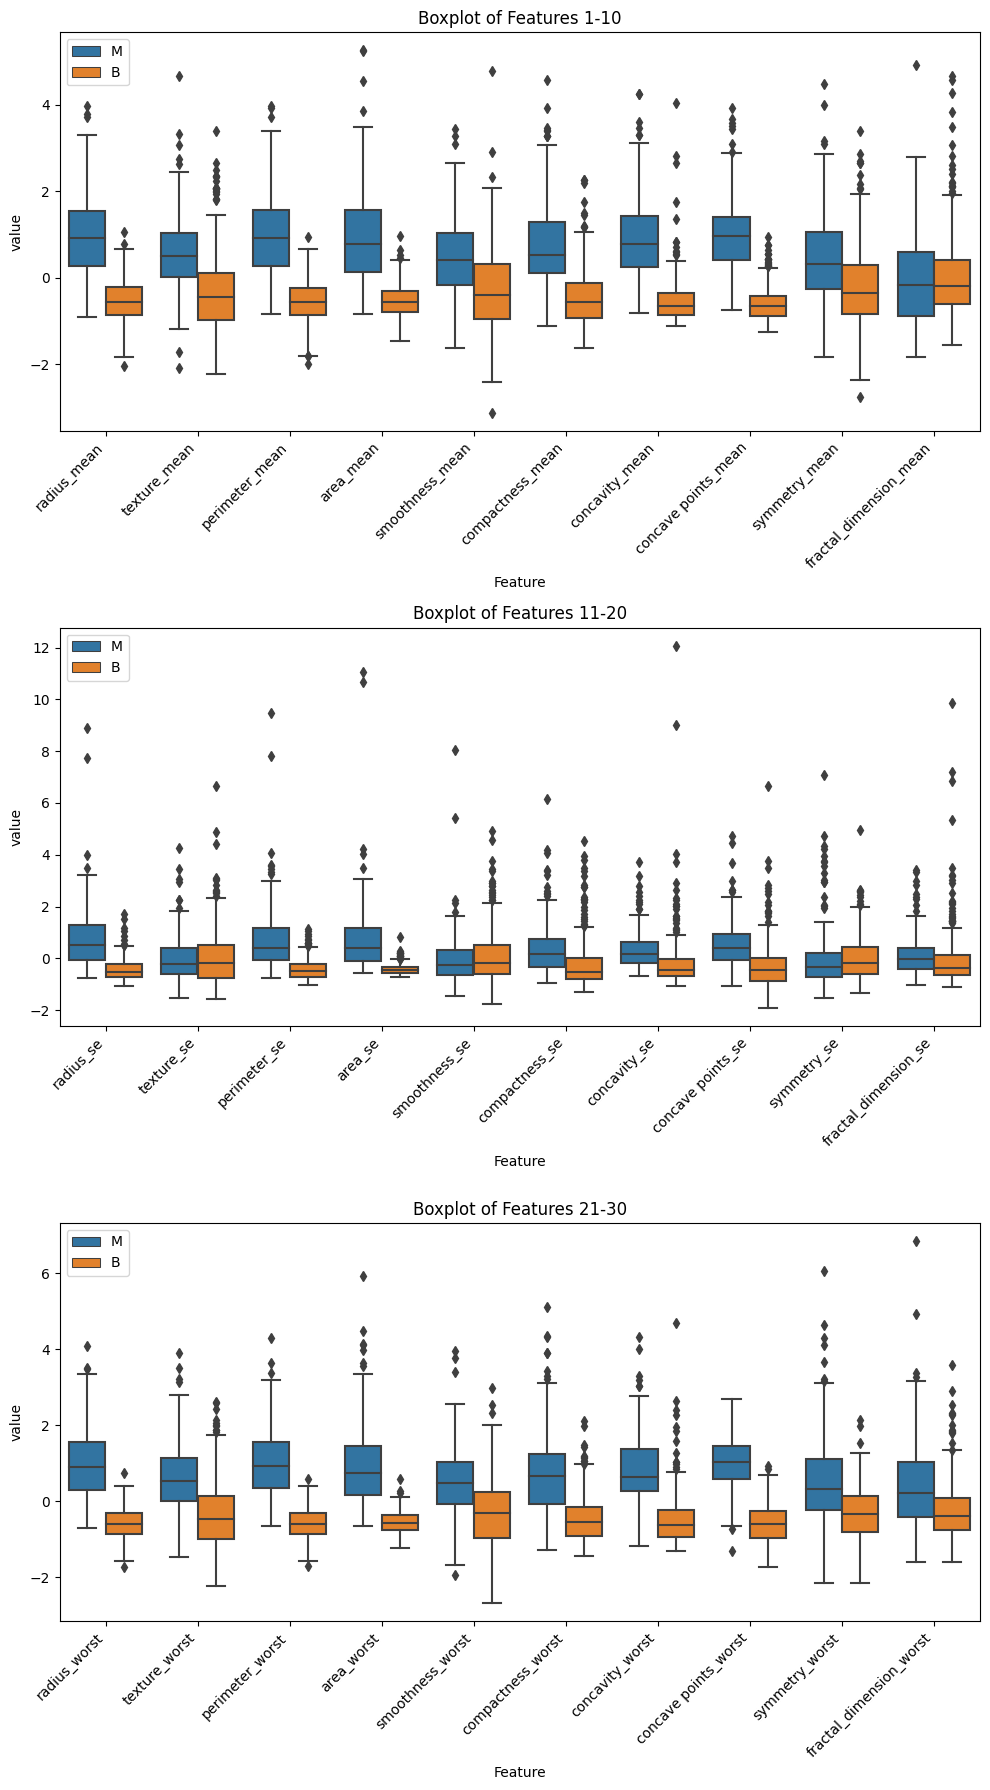

In [15]:
# Boxplot of the complete feature, sepatated into Benign and Malignant

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)

# Adding a 'diagnosis' column containing 'M' or 'B' values
scaled_df['diagnosis'] = y

# Dividing the features into three sets for subplots
features_1 = scaled_df.columns[:10]
features_2 = scaled_df.columns[10:20]
features_3 = scaled_df.columns[20:]

# Creating subplots for M and B categories separately
plt.figure(figsize=(10, 18))

for i, features in enumerate([features_1, features_2, features_3], start=1):
    plt.subplot(3, 1, i)
    data_to_plot = pd.melt(scaled_df, id_vars='diagnosis', value_vars=features, var_name='Feature')
    sns.boxplot(x='Feature', y='value', hue='diagnosis', data=data_to_plot)
    plt.title(f'Boxplot of Features {i * 10 - 9}-{i * 10}')
    plt.legend(loc='upper left')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


The Boxplots show that all features, whether separated into Benign and Malignant or not, have a lot of outliers. This means that a proper Scaling method shall be selected (Robust, Standard or MinMax) depending on the feature.

## Correlations

The best way to visualize the features correlation is by using a Heatmap. Alternativelly a Joint plot and Pearsonr coefficient can be used to visualize two specific features and its correlation.

### Heatmap

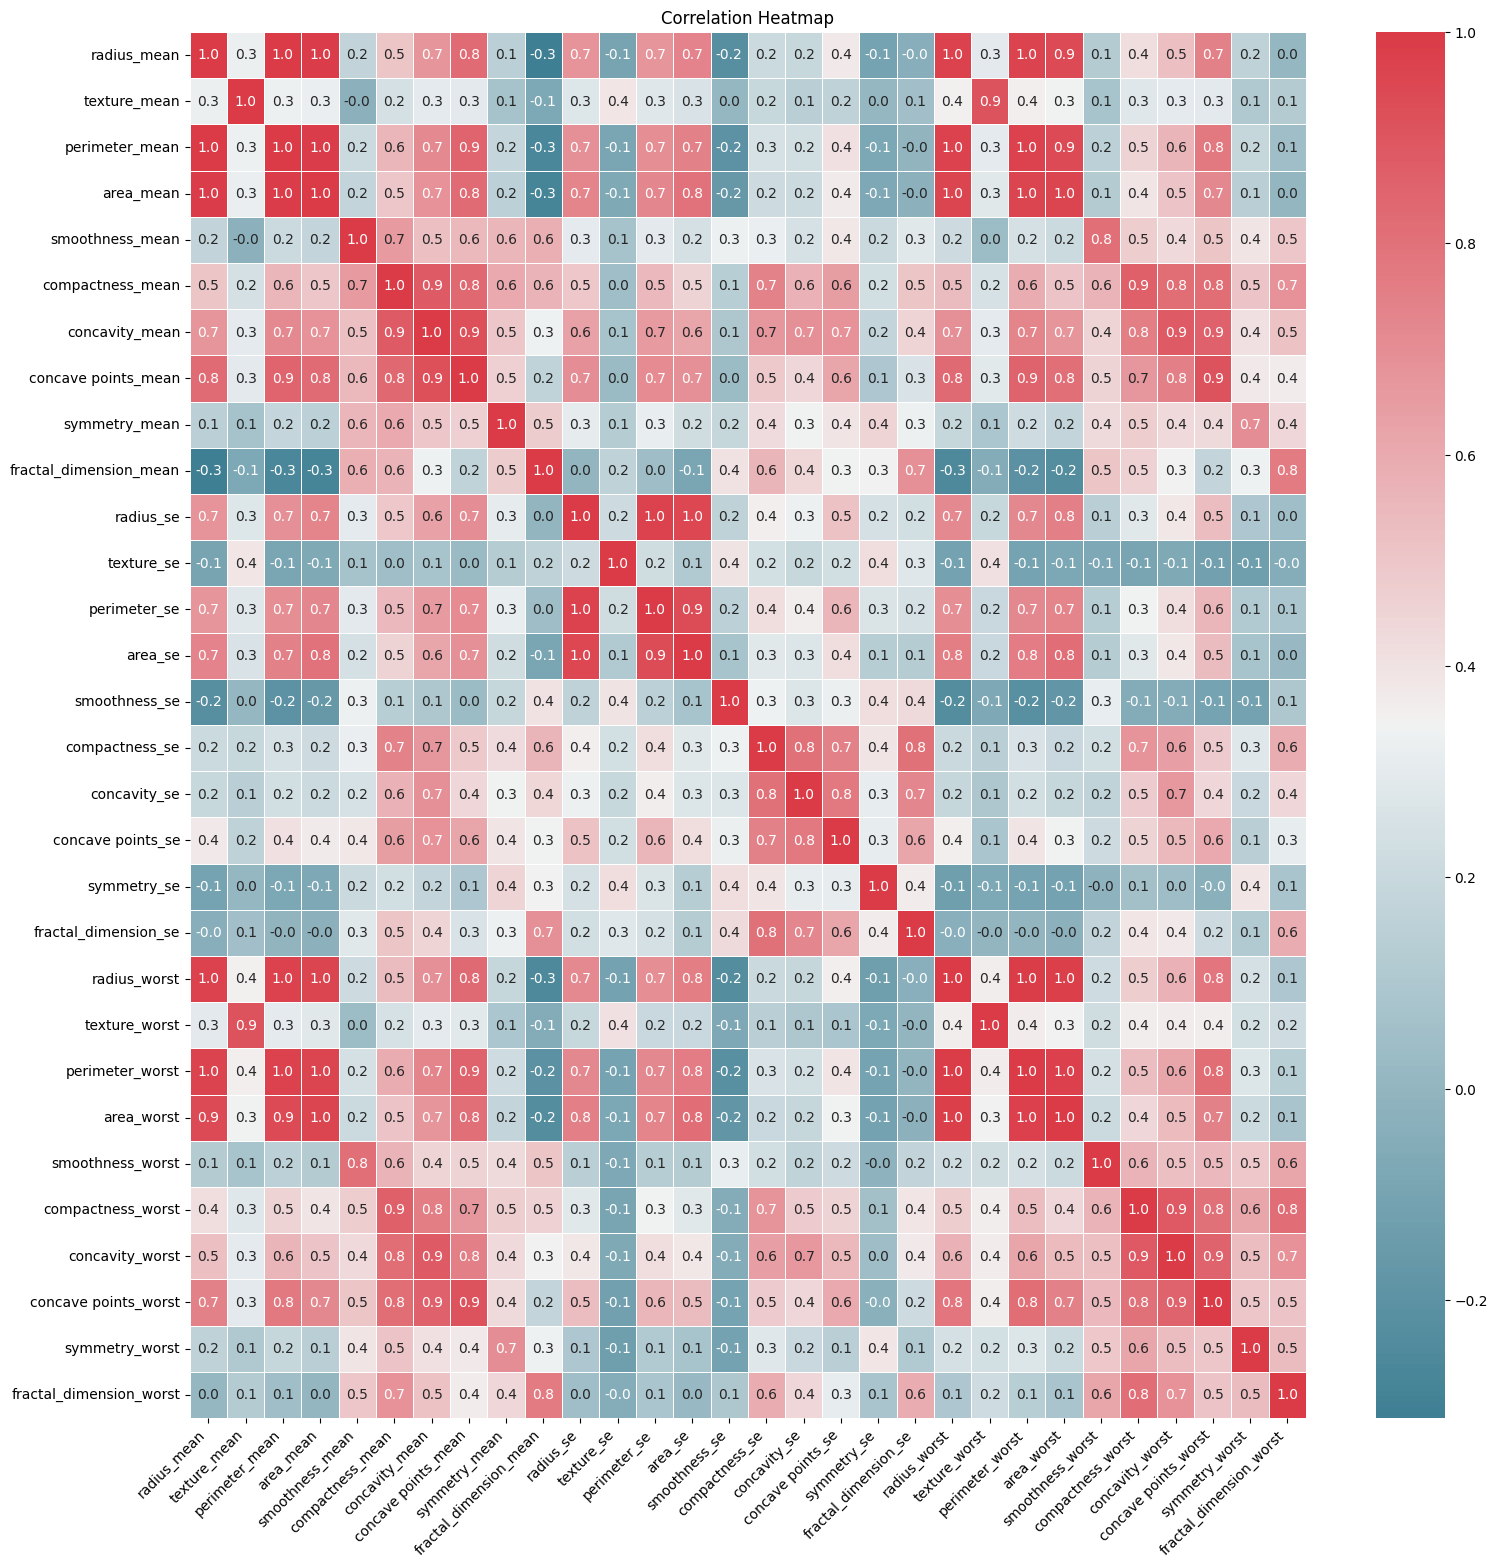

In [16]:
# Plot Bitcoin correlations
f,ax = plt.subplots(figsize=(18, 18))
plt.title('Correlation Heatmap')
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap=cmap)
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

### Jointplot

The join plot helps to visualize correlations between features. The pearson correlation value represent how correlated are the features

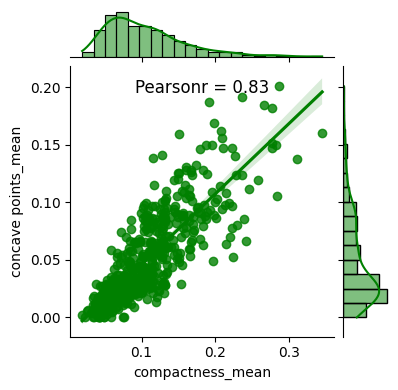

In [17]:
# Calculate Pearson correlation coefficient
corr, _ = pearsonr(X['compactness_mean'], X['concave points_mean'])

# Plotting a joint plot for the two columns with Pearson correlation coefficient
plot = sns.jointplot(x='compactness_mean', y='concave points_mean', data=X, kind="reg", color="green", height=4)

# Annotate Pearson correlation coefficient on the plot
plot.ax_joint.annotate(f"Pearsonr = {corr:.2f}", xy=(0.5, 0.9), xycoords='axes fraction', ha='center', fontsize=12)

plt.show()

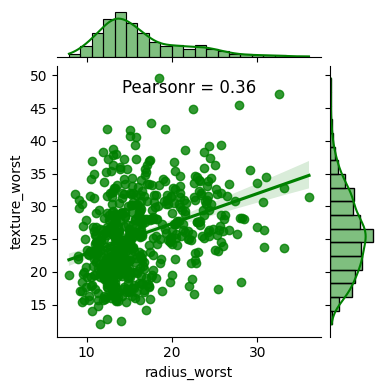

In [18]:
# Calculate Pearson correlation coefficient
corr, _ = pearsonr(X['radius_worst'], X['texture_worst'])

# Plotting a joint plot for the two columns with Pearson correlation coefficient
plot = sns.jointplot(x='radius_worst', y='texture_worst', data=X, kind="reg", color="green", height=4)

# Annotate Pearson correlation coefficient on the plot
plot.ax_joint.annotate(f"Pearsonr = {corr:.2f}", xy=(0.5, 0.9), xycoords='axes fraction', ha='center', fontsize=12)

plt.show()

### Skewness

Previously the scaler used was StandardScaler. However all features show a significant amount of outlier. As this scaler is very sensitive to outliers, it might be better to use RobustScaler. We can first check the skewness to see the symmetry (Gaussianity ) of the distribution, in order to decide which Scaler works better.

In [19]:
# Checking Skewness

skewness = X.skew()

# Create a new DataFrame with the skewness values
skewness_df = pd.DataFrame(skewness)

# Rename the column '0' to 'skewness'
skewness_df = skewness_df.rename(columns={0: 'skewness'})

skewness_df.sort_values(by='skewness', ascending=False)

skewness
area_se                  5.447186
concavity_se             5.110463
fractal_dimension_se     3.923969
perimeter_se             3.443615
radius_se                3.088612
smoothness_se            2.314450
symmetry_se              2.195133
compactness_se           1.902221
area_worst               1.859373
fractal_dimension_worst  1.662579
texture_se               1.646444
area_mean                1.645732
compactness_worst        1.473555
concave points_se        1.444678
symmetry_worst           1.433928
concavity_mean           1.401180
fractal_dimension_mean   1.304489
compactness_mean         1.190123
concave points_mean      1.171180
concavity_worst          1.150237
perimeter_worst          1.128164
radius_worst             1.103115
perimeter_mean           0.990650
radius_mean              0.942380
symmetry_mean            0.725609
texture_mean             0.650450
texture_worst            0.498321
concave points_worst     0.492616
smoothness_mean          0.456324
smoothness_worst         0.415426

Skewness measures the asymmetry of the probability distribution of a variable.

- If skewness is **close to 0**, the distribution is approximately **symmetrical**.
- If skewness is **greater than 1**, the distribution is **right-skewed** (positively skewed), which means it has a long tail on the right side.
- If skewness is **less than 0**, the distribution is **left-skewed** (negatively skewed), which means it has a long tail on the left side.

Based on the results we have the Symmetrical and Right-Skewed features:

Now we will visualize the Distribution, Outliers and Gaussianity of each features separatelly.

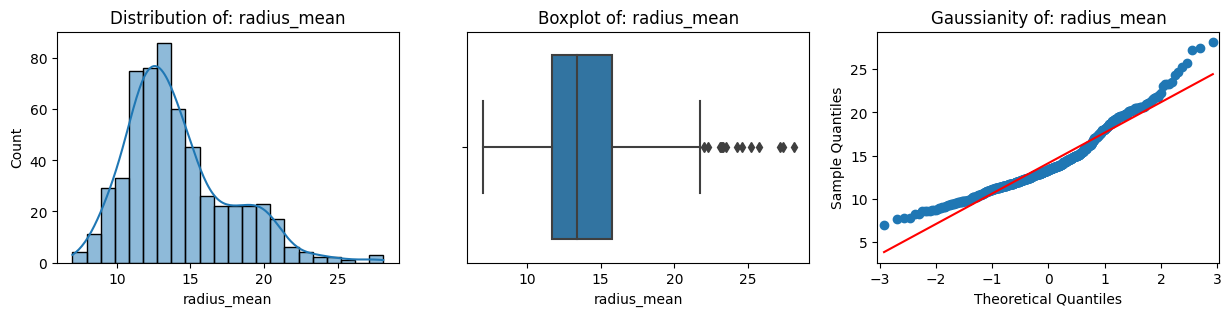

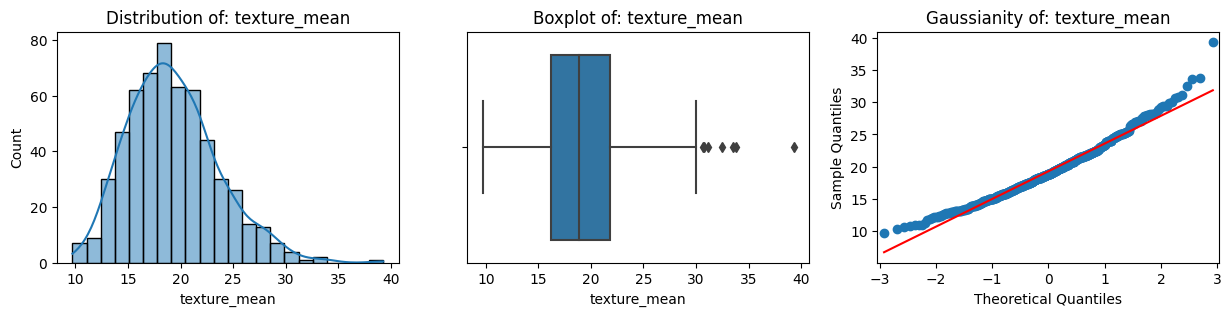

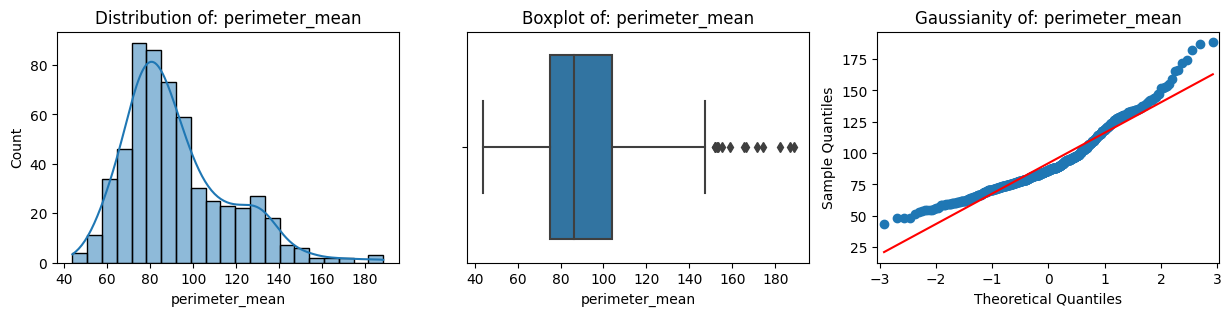

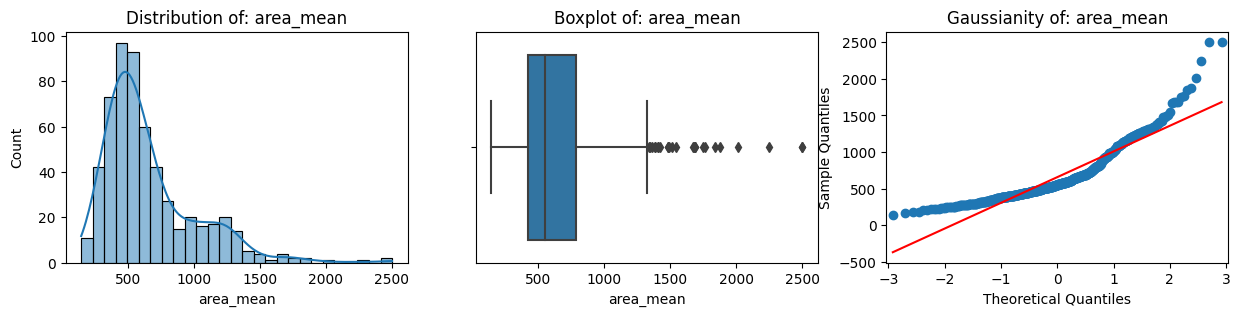

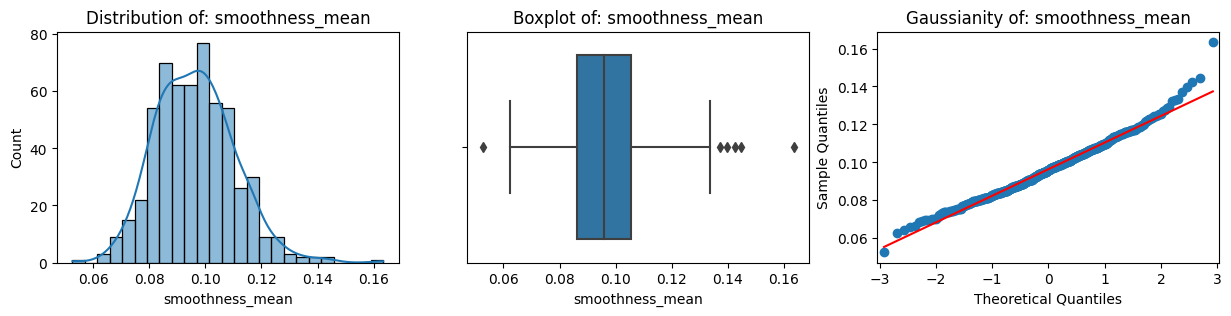

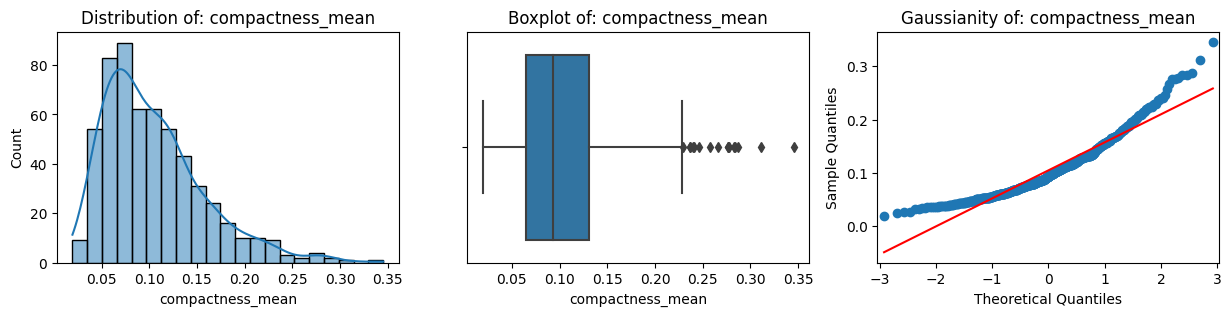

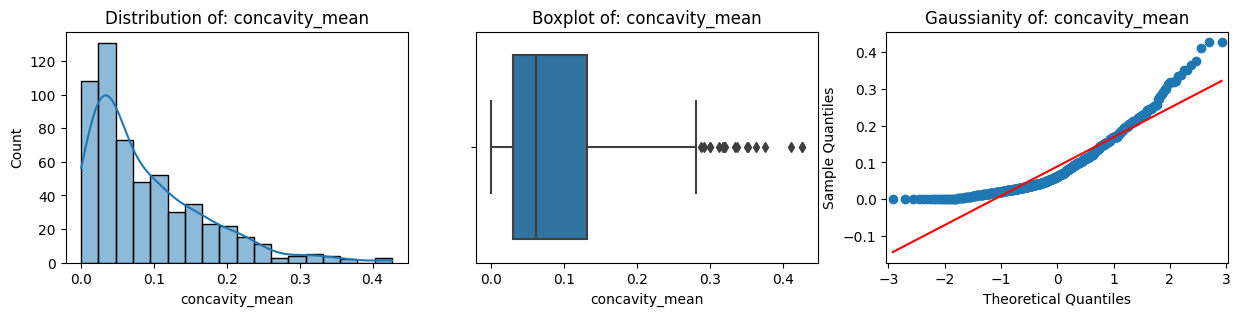

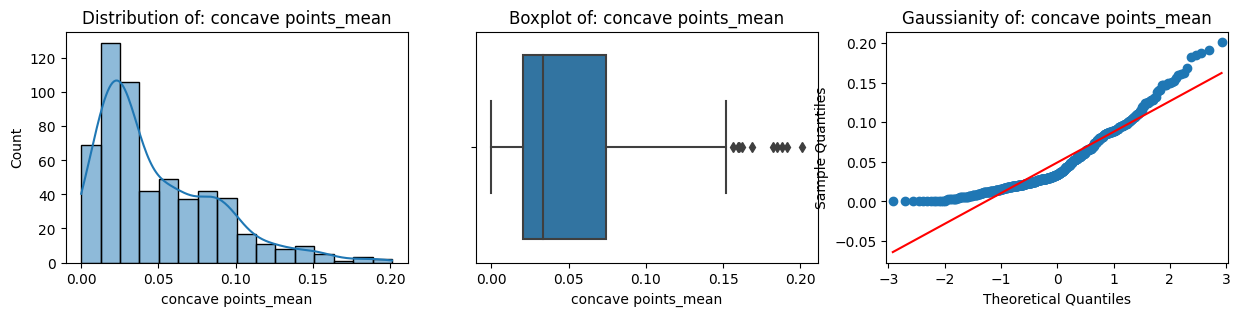

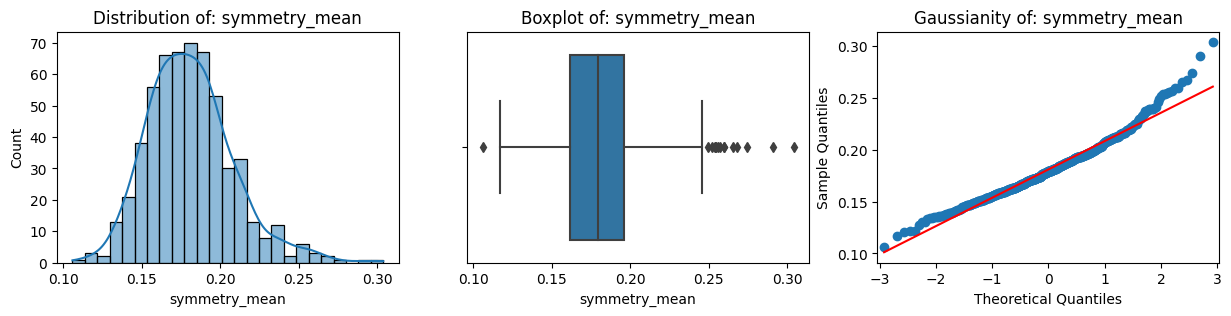

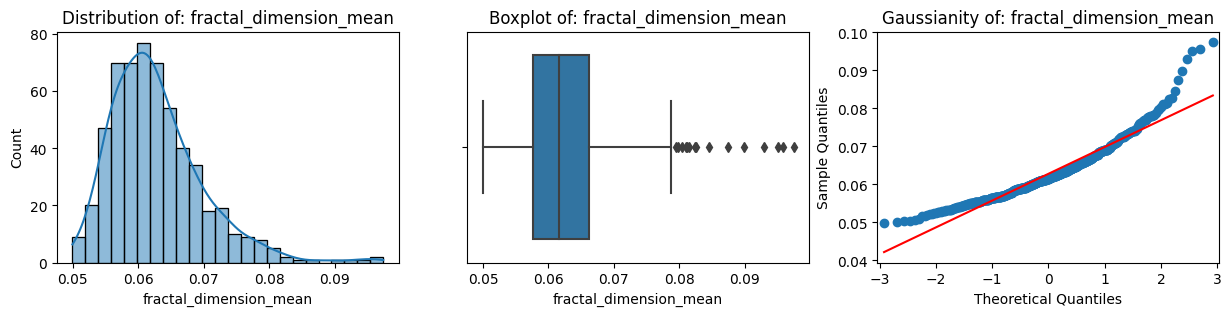

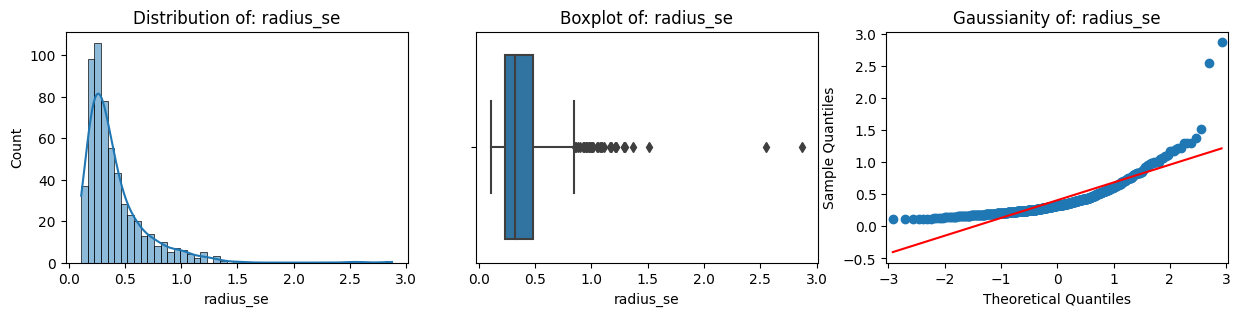

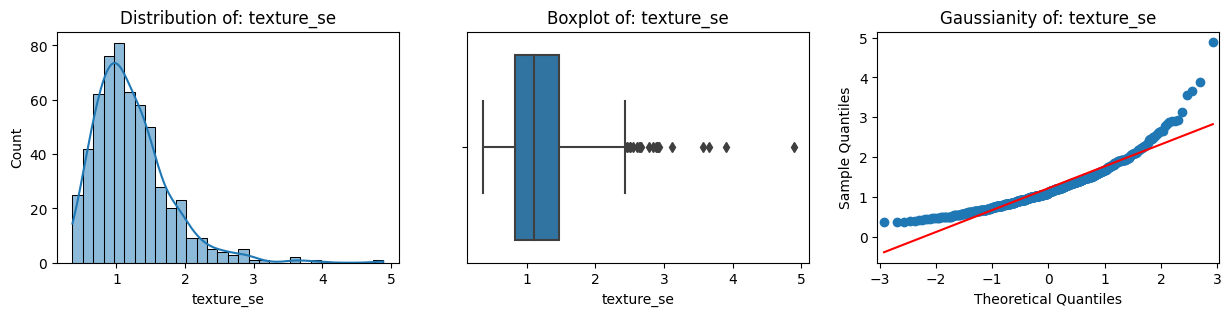

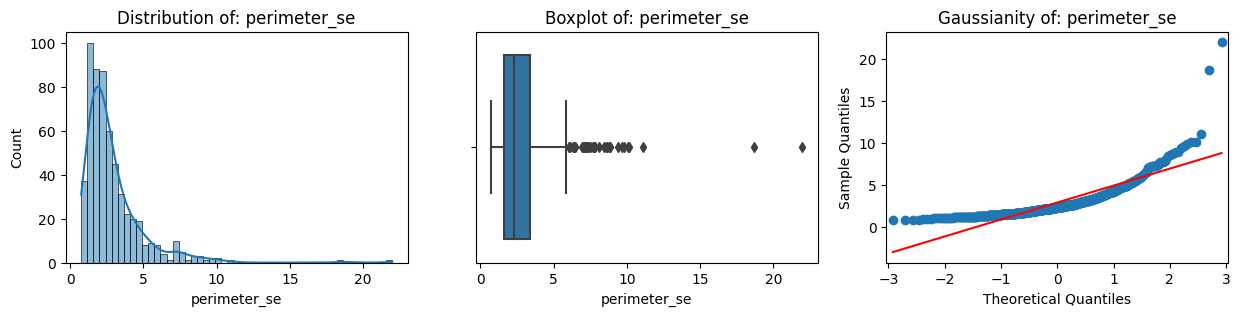

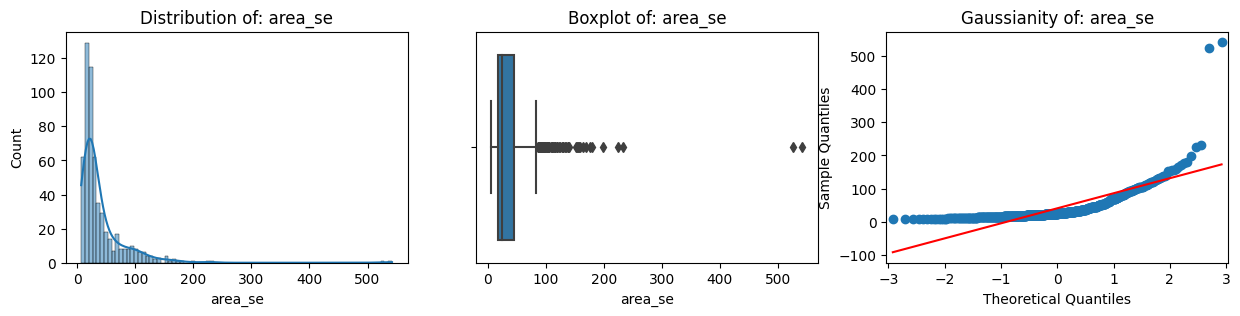

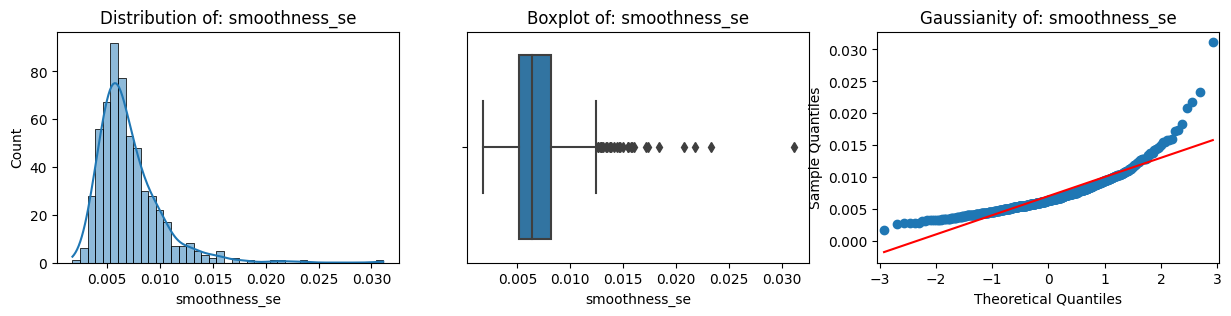

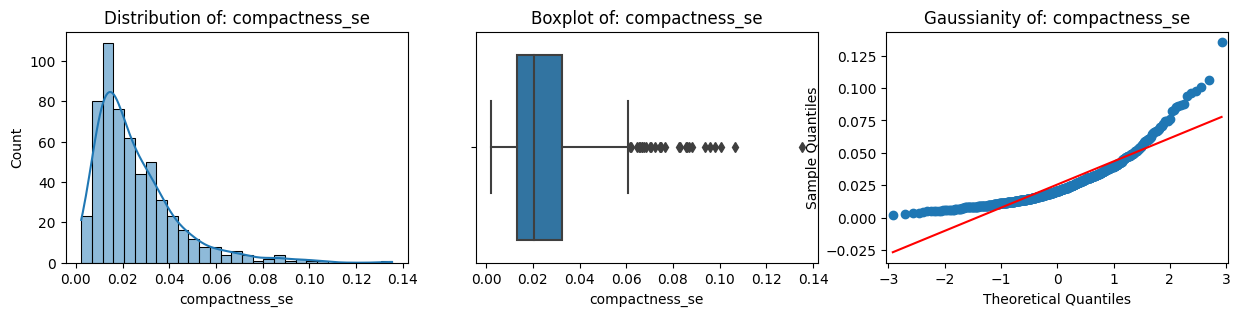

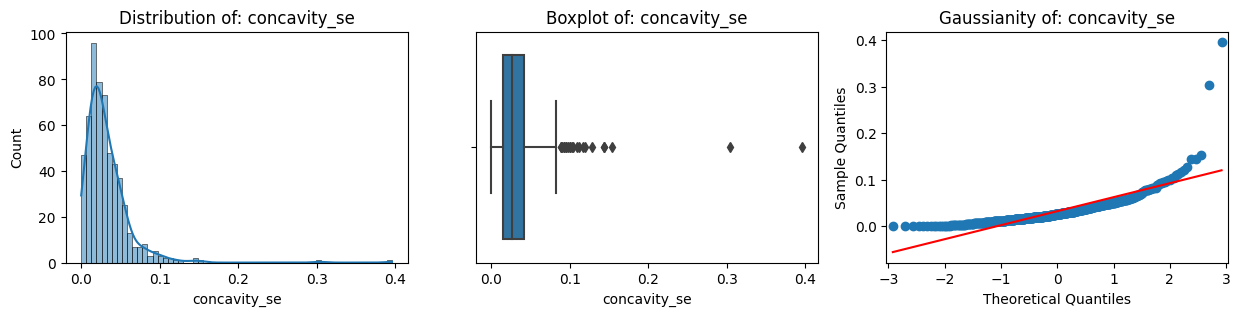

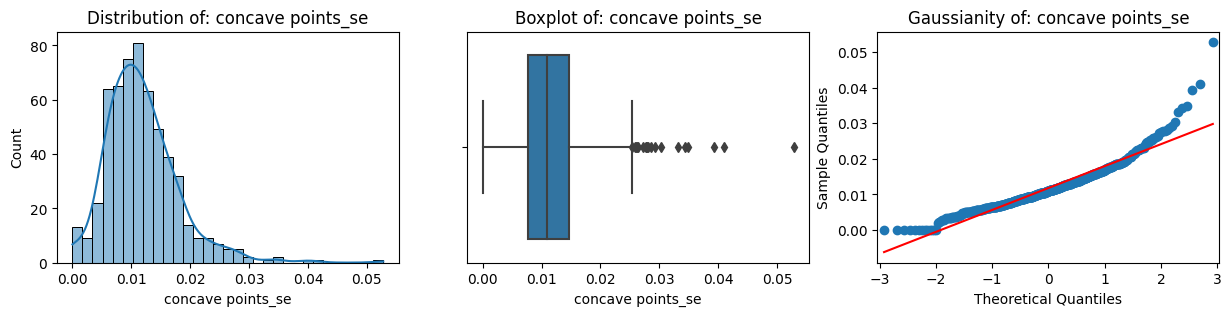

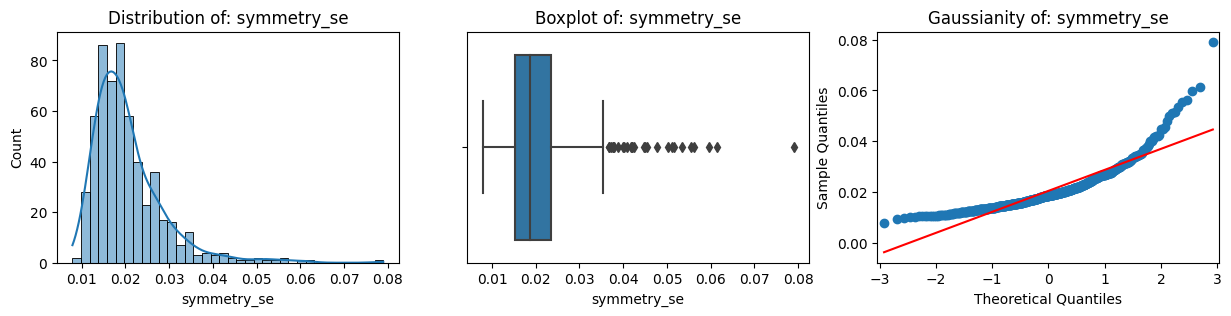

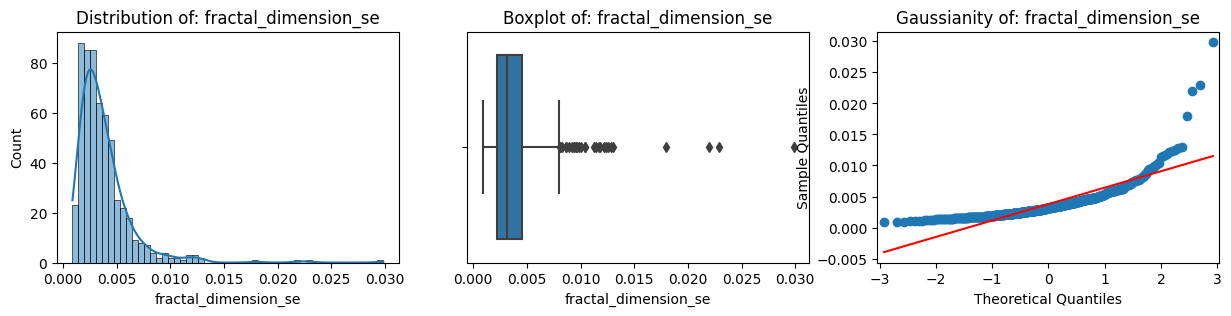

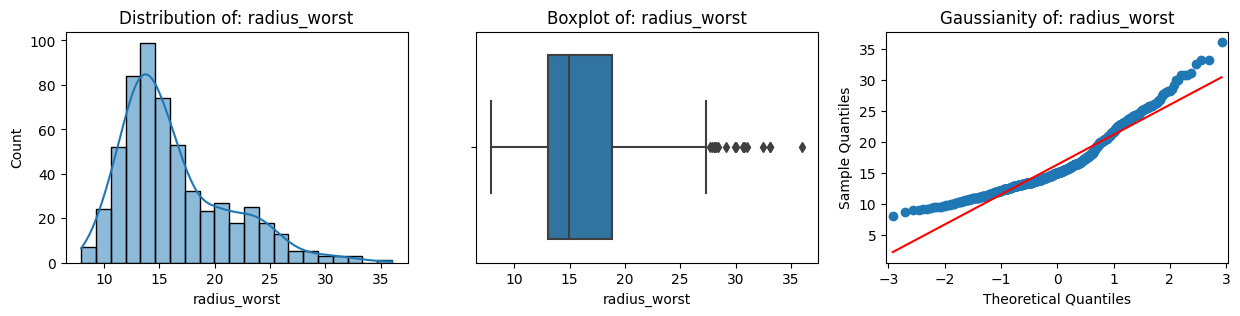

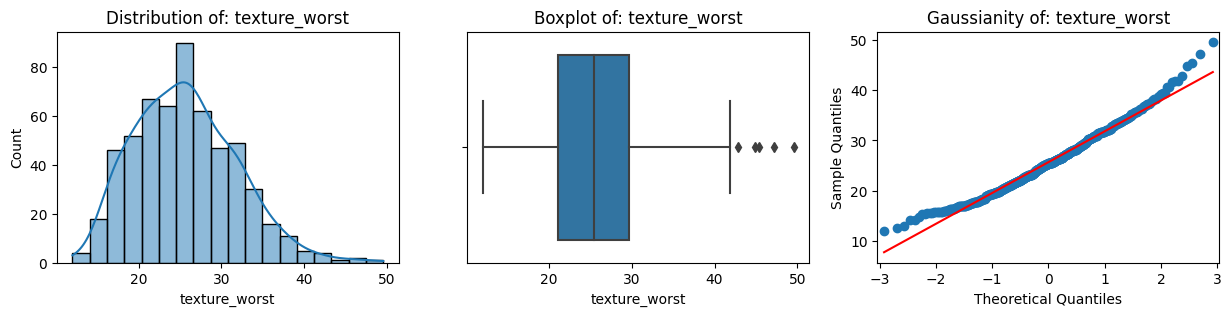

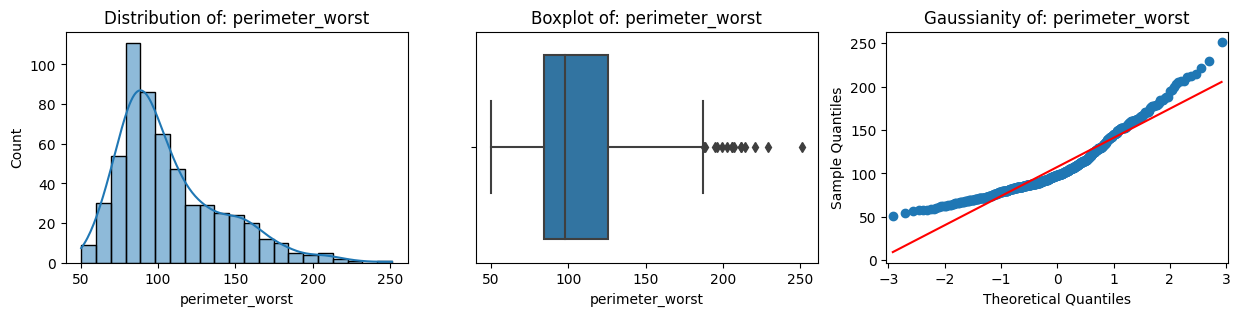

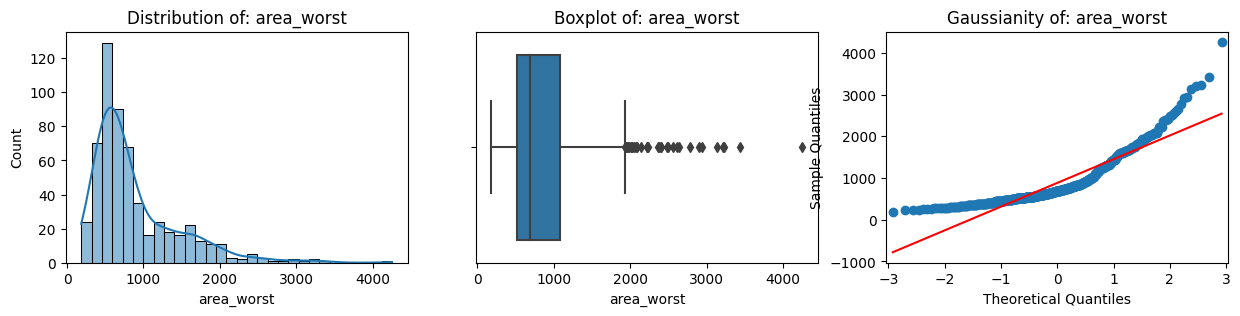

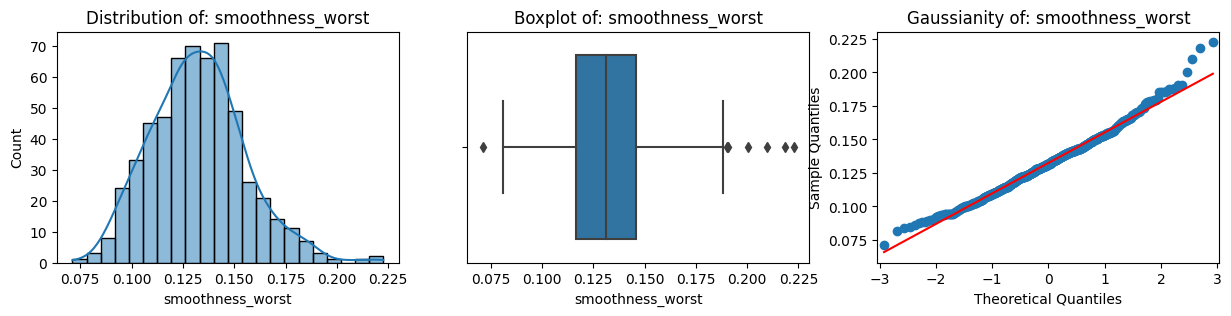

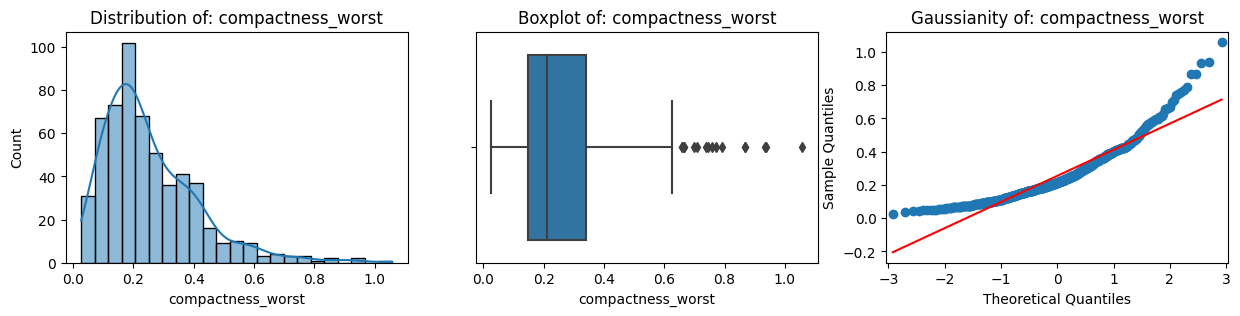

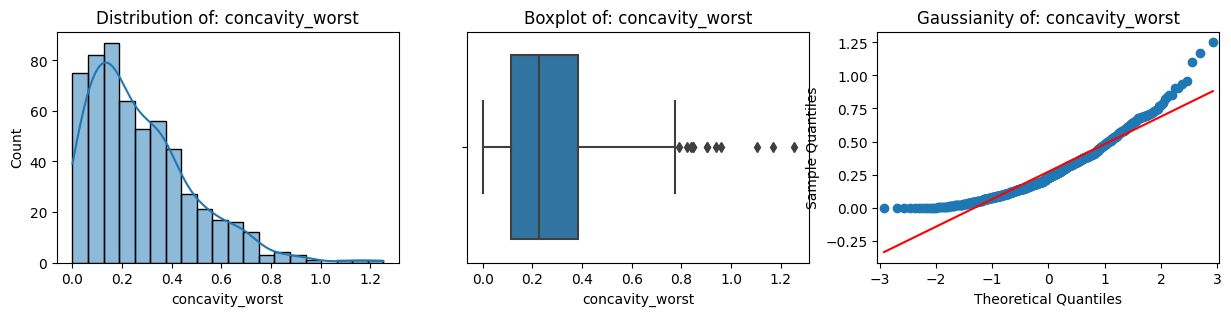

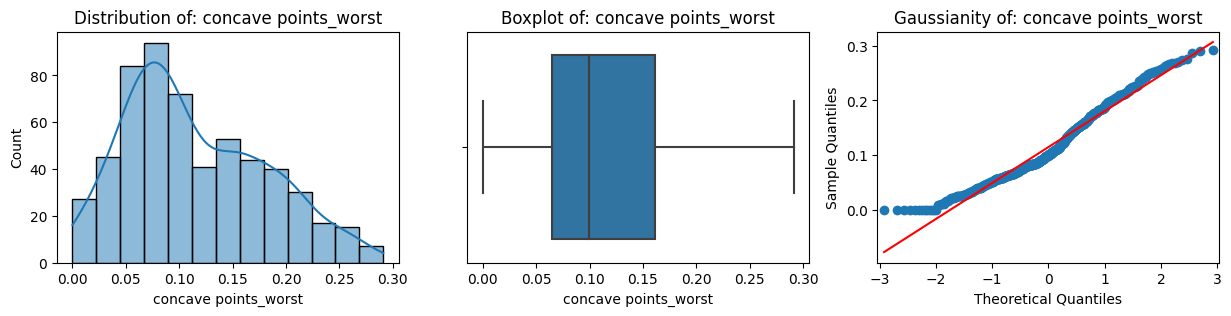

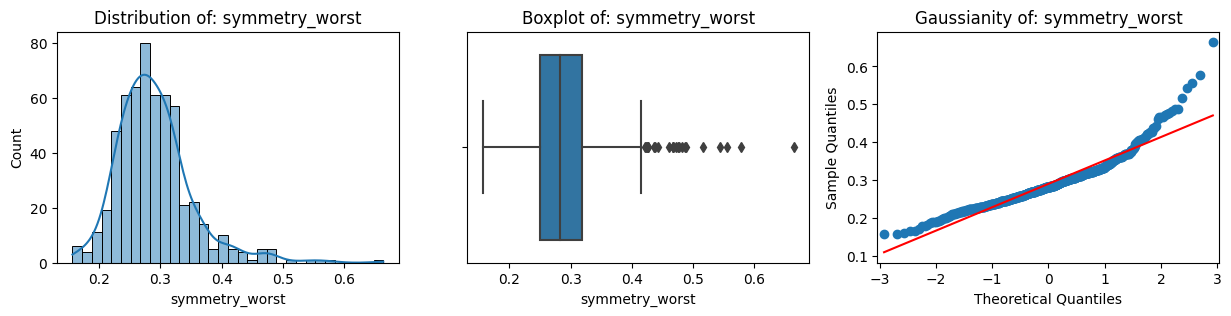

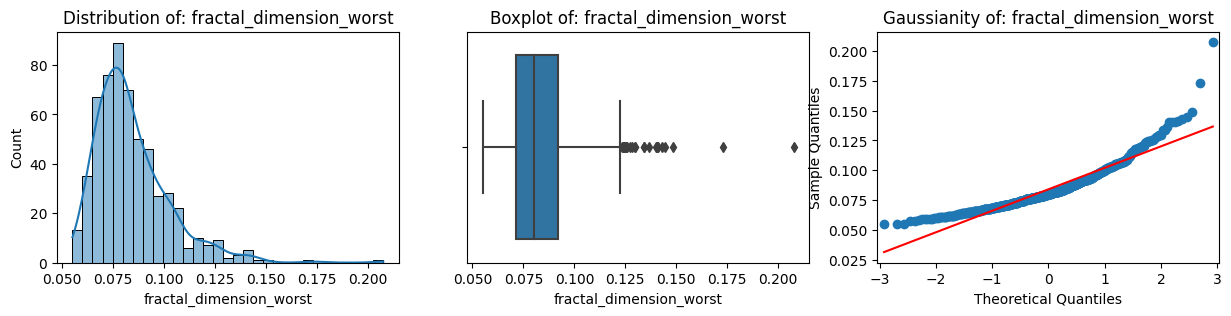

In [20]:
# Visualization

for numerical_feature in X.columns:

    # Creating three subplots per numerical_feature
    fig, ax =plt.subplots(1,3,figsize=(15,3))

    # Histogram to get an overview of the distribution of each numerical_feature
    ax[0].set_title(f"Distribution of: {numerical_feature}")
    sns.histplot(data = X, x = numerical_feature, kde=True, ax = ax[0])

    # Boxplot to detect outliers
    ax[1].set_title(f"Boxplot of: {numerical_feature}")
    sns.boxplot(data = X, x = numerical_feature, ax=ax[1])

    # Analyzing whether a feature is normally distributed or not
    ax[2].set_title(f"Gaussianity of: {numerical_feature}")
    qqplot(X[numerical_feature],line='s',ax=ax[2]);

Based on the Distributions we will select different scalers for our features preprocessing.


***StandardScaler:***

- StandardScaler scales features by subtracting the mean and dividing by the standard deviation.
- It assumes that the data is *normally distributed* (or at least approximately normally distributed) and it is *sensitive to outliers*
- *Facit:*  when data is normally distributed or when you want to transform the data to have a mean of 0 and a standard deviation of 1.

***RobustScaler:***

- RobustScaler scales features using statistics that are robust to outliers, making it suitable for data with many outliers or a heavy-tailed distribution.
- It uses the median and the interquartile range (IQR) for scaling, rather than the mean and standard deviation used in StandardScaler.
- *Facit:* when data contains significant outliers, and you want to prevent them from heavily influencing the scaling process.

***MinMaxScaler:***

- MinMaxScaler scales features to a specified range, typically between 0 and 1.
- It works well when the data needs to be scaled to a specific range, and there are no significant outliers.
- Good if we do not have a Gaussian Distribution in the feature
- It neither reduces the effect of outliers nor changes skewness.
- *Facit:* when you want to preserve the relative relationships between the data points and map them to a specific range. a specific range.

# Feature Selection

## Scaling

We first define the subsets of features that should be scaled by each scaler. Then we use ColumnTransformer to apply these scalers to their respective feature sets. The remainder='passthrough' argument allows any columns not specified to be passed through without transformation.

Finally, we create another ColumnTransformer (preprocessor) that applies the num_transformer to the numeric features in the DataFrame.

In [21]:
# Selected Scalers

features_robust = [
                    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "compactness_mean", "concavity_mean",
                    "concave points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se",
                    "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se",
                    "fractal_dimension_se", "radius_worst", "perimeter_worst", "area_worst", "compactness_worst", "concavity_worst",
                    "symmetry_worst", "fractal_dimension_worst"
                ]

features_standard = ["smoothness_mean", "texture_worst", "smoothness_worst"]

features_minmax = ["concave points_worst"]

In [22]:
# Column Transformer and Pipeline with the 3 Scalers

scalers = ColumnTransformer(
    transformers=[
        ("robust_scaler", RobustScaler(), features_robust),
        ("standard_scaler", StandardScaler(), features_standard),
        ("minmax_scaler", MinMaxScaler(), features_minmax)
    ],
    remainder='passthrough'
)


num_transformer = make_pipeline(scalers)
num_transformer

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robust_scaler',
                                                  RobustScaler(),
                                                  ['radius_mean',
                                                   'texture_mean',
                                                   'perimeter_mean',
                                                   'area_mean',
                                                   'compactness_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'symmetry_mean',
                                                   'fractal_dimension_mean',
                                                   'radius_se', 'texture_se',
                                                   'perimeter_se', 'area_se',
                                                   'smoothness_se',
                                                   'c...
                                                   'concavity_se',
                                                   'concave points_se',
                                                   'symmetry_se',
                                                   'fractal_dimension_se',
                                                   'radius_worst',
                                                   'perimeter_worst',
                                                   'area_worst',
                                                   'compactness_worst',
                                                   'concavity_worst',
                                                   'symmetry_worst',
                                                   'fractal_dimension_worst']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['smoothness_mean',
                                                   'texture_worst',
                                                   'smoothness_worst']),
                                                 ('minmax_scaler',
                                                  MinMaxScaler(),
                                                  ['concave points_worst'])]))])

In [23]:
# Let's plot the result

df_num_scaled = pd.DataFrame(num_transformer.fit_transform(X), columns=X.columns)
df_num_scaled.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.132353     -1.502664        1.263740   1.241446         2.824832   
1     1.764706     -0.190053        1.612859   2.138245        -0.213653   
2     1.549020      0.428064        1.512617   1.798841         1.027337   
3    -0.477941      0.273535       -0.299343  -0.455298         2.921045   
4     1.696078     -0.799290        1.688904   2.058223         0.613470   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          2.358711        2.115850             1.855030       2.039192   
1          0.250742        0.682995             0.059172      -0.578385   
2          1.343287        1.758242             0.819527      -0.184086   
3          1.778327        1.335444             2.381657       4.263658   
4          1.349219        1.318681             0.050296      -0.321853   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                3.126978  ...      2.105595       2.343063         2.364252   
1                0.889655  ...      1.480746       2.232284        -0.131839   
2                1.709533  ...      1.328167       1.797960         1.107869   
3                0.695335  ...      0.029305      -0.208897         3.410109   
4                1.756592  ...      1.320901       1.562335        -0.035956   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    1.807750          2.635556           1.884578         1.568466   
1    0.055514         -0.106667           0.435500        -0.826962   
2    0.833458          1.171852           0.365664         0.942210   
3    1.714605          5.653333           4.508244         3.283553   
4    0.645678         -0.678519          -0.158099         0.280372   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0             -1.359293        1.307686                 0.912027  
1             -0.369203       -0.375612                 0.639175  
2             -0.023974        0.527407                 0.835052  
3              0.133984        3.394275                 0.884880  
4             -1.466770        0.220556                 0.558419  

[5 rows x 30 columns]

## PCA Analysis

Now we can perform a PCA before running our clustering algorithm. This way we can improve the following:

- reduce dimensionality to get a better visual feedback on our clustering
- use the orthogonality of the principal components so that the KMeans algorithm increases its clustering power

In [24]:
# Fitting PCA

pca = PCA()
pca.fit(df_num_scaled)

PCA()

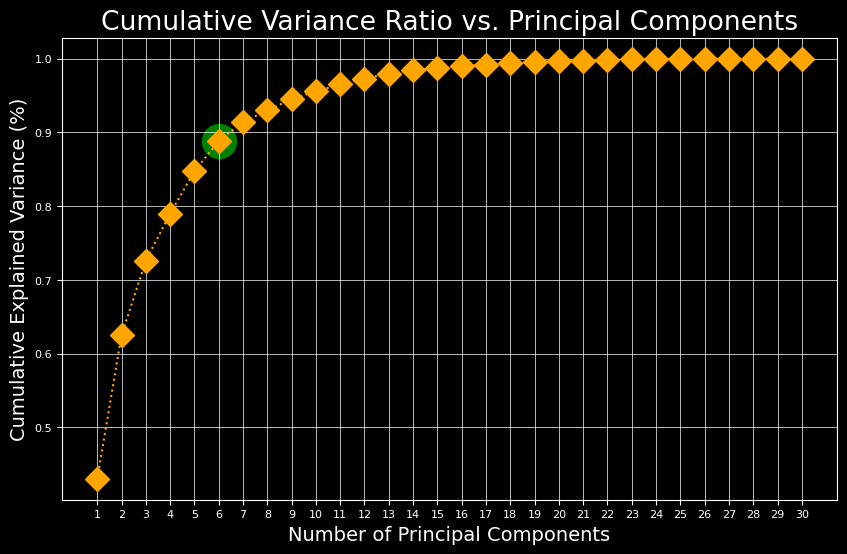

In [25]:
# Using the elbow method to find the right number of PCAs

with plt.style.context("dark_background"):
    # Set larger font and label sizes
    plt.rcParams['font.size'] = 16
    plt.rcParams['axes.labelsize'] = 14
    plt.rcParams['xtick.labelsize'] = 8
    plt.rcParams['ytick.labelsize'] = 8

    # Create a new figure with custom colors and styles
    plt.figure(figsize=(10, 6))
    ax = plt.gca()

    explained_variance_ratio_cumulated = np.cumsum(pca.explained_variance_ratio_)
    x_axis_ticks = np.arange(1, explained_variance_ratio_cumulated.shape[0] + 1)

    # Find the position where explained_variance_ratio_cumulated exceeds 0.8
    nr_PC = np.argmax(explained_variance_ratio_cumulated > 0.85) + 1

    # Plot the cumulative explained variance with custom styles
    ax.plot(x_axis_ticks, explained_variance_ratio_cumulated, label="Cumulative Variance Ratio", color="orange", linestyle=":", marker="D", markersize=12)

    # Customizing the plot
    ax.set_xlabel('Number of Principal Components')
    ax.set_ylabel('Cumulative Explained Variance (%)')
    ax.set_title('Cumulative Variance Ratio vs. Principal Components')
    ax.set_xticks(x_axis_ticks)

    # Highlight the point where explained_variance_ratio_cumulated exceeds 0.8 with a larger green dot
    ax.scatter(nr_PC, explained_variance_ratio_cumulated[nr_PC - 1], c='green', s=600)
    ax.grid(axis="x", linewidth=0.5)
    ax.grid(axis="y", linewidth=0.5)

plt.show()


A common approach is to set a minimum threshold for the explained variance. By setting this we see that our first 5 PCs explain more than 80 % of the vairance.

In [26]:
# Fitting the model with the calculated PCAs

threhsold_pca = nr_PC

pca = PCA(n_components=threhsold_pca, whiten=True)
pca.fit(df_num_scaled)

df_pca = pd.DataFrame(pca.transform(df_num_scaled))
df_pca

0         1         2         3         4         5
0    2.560070  0.705603 -0.348728 -2.320377  1.473321  1.616091
1    0.687268 -1.405610 -0.379461  0.156268  1.050759 -0.110999
2    1.485157 -0.279544 -0.501724 -0.374654  0.532308  0.533265
3    1.384006  4.229419 -1.881697 -2.157262 -1.094959  3.572863
4    1.223948 -0.602825  0.808826 -0.765506  1.732622 -1.166129
..        ...       ...       ...       ...       ...       ...
564  2.112139 -1.332929  1.217394 -0.534667  0.349955 -2.169161
565  1.205643 -1.330756  0.554713  1.187591 -1.680870 -0.239230
566  0.335754 -0.618091  0.033962  1.962386 -0.276979 -0.780177
567  2.452637  0.985796 -1.818532  0.998417 -1.065270  0.494134
568 -1.269523 -0.556266  1.169888  0.972446 -1.411786  1.403989

[569 rows x 6 columns]

Now we determine the optimal number of clusters for K-Means using the within-cluster sum of squares (**WCSS**) method and the "elbow" or "knee" point in the WCSS curve:

- **Calculate WCSS for different numbers of clusters**: The code iterates through a range of cluster numbers from 1 to max_clusters - 1 and fits a K-Means model to the data. The kmeans.inertia_ attribute returns the WCSS for the current number of clusters, which is then appended to the wcss list.

- **Determine the optimal number of clusters**: The KneeLocator is used to find the optimal number of clusters based on the WCSS values. The 'elbow' or 'knee' point represents the optimal number of clusters where adding more clusters doesn't significantly reduce the WCSS.

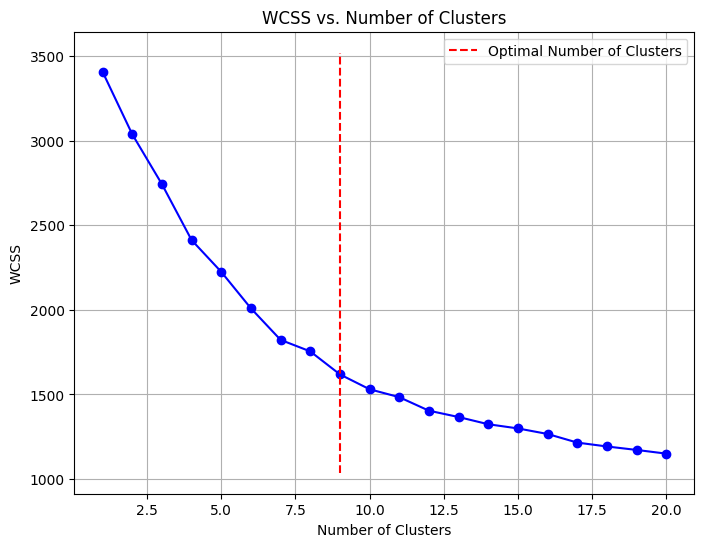

Optimal number of clusters: 9


In [27]:
# Finding the right number of clusters

wcss = []

max_clusters = 21

for i in range(1, max_clusters):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init="auto")
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

# Plot the WCSS curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters), wcss, marker='o', linestyle='-', color='b')
plt.title('WCSS vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)

# Use KneeLocator to find the optimal number of clusters
knee_locator = KneeLocator(range(1, max_clusters), wcss, curve='convex', direction='decreasing')

# Mark the "elbow" point on the plot
plt.vlines(knee_locator.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='--', colors='r', label='Optimal Number of Clusters')
plt.legend()

# Show the plot
plt.show()

# Print the optimal number of clusters
print("Optimal number of clusters:", knee_locator.elbow)

In [28]:
# Plotting 3 features with the scaled data and reduced dimensions

nr_clusters = knee_locator.elbow

print('Working with ' + str(nr_clusters) + ' clusters and ' + str(nr_PC) + " PCs", flush=True)
print("-"*33)

kmeans = KMeans(n_clusters = nr_clusters, max_iter = 300, n_init = "auto")

kmeans.fit(df_pca)

labels = kmeans.labels_

fig_scaled = px.scatter_3d(df_pca,
                           x = 0,
                           y = 1,
                           z = 2,
                           color=labels,
                           width=500,
                           height=500)
fig_scaled.show()

Working with 9 clusters and 6 PCs
---------------------------------


Now we see that the clusters are very well organized in 6 groups. Although we could change the threshold in the PCA Analysis, lets perform a model with this selection and see the results.

# Modelling

For the modelling part a Random Forest Classifier will be used.

First, we will perform a baseline model with Sklearn and the scaled dataset. Then based on the PCA Analysis only the best 6 features will be selected. Finally, the same approach will be performed with Spark but with the original data set and the best features of the selected model.

## Baseline Sklearn Model

Random Forest Classifier

In [29]:
# Transform the class labels from their original string representation (M and B) into integers
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [30]:
# Select features
X = df_num_scaled
y = df.diagnosis

X.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.132353     -1.502664        1.263740   1.241446         2.824832   
1     1.764706     -0.190053        1.612859   2.138245        -0.213653   
2     1.549020      0.428064        1.512617   1.798841         1.027337   
3    -0.477941      0.273535       -0.299343  -0.455298         2.921045   
4     1.696078     -0.799290        1.688904   2.058223         0.613470   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          2.358711        2.115850             1.855030       2.039192   
1          0.250742        0.682995             0.059172      -0.578385   
2          1.343287        1.758242             0.819527      -0.184086   
3          1.778327        1.335444             2.381657       4.263658   
4          1.349219        1.318681             0.050296      -0.321853   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                3.126978  ...      2.105595       2.343063         2.364252   
1                0.889655  ...      1.480746       2.232284        -0.131839   
2                1.709533  ...      1.328167       1.797960         1.107869   
3                0.695335  ...      0.029305      -0.208897         3.410109   
4                1.756592  ...      1.320901       1.562335        -0.035956   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    1.807750          2.635556           1.884578         1.568466   
1    0.055514         -0.106667           0.435500        -0.826962   
2    0.833458          1.171852           0.365664         0.942210   
3    1.714605          5.653333           4.508244         3.283553   
4    0.645678         -0.678519          -0.158099         0.280372   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0             -1.359293        1.307686                 0.912027  
1             -0.369203       -0.375612                 0.639175  
2             -0.023974        0.527407                 0.835052  
3              0.133984        3.394275                 0.884880  
4             -1.466770        0.220556                 0.558419  

[5 rows x 30 columns]

In [31]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [32]:
# Model RandomForestClassifier

clf = RandomForestClassifier(n_estimators=30, random_state=10,criterion='log_loss')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

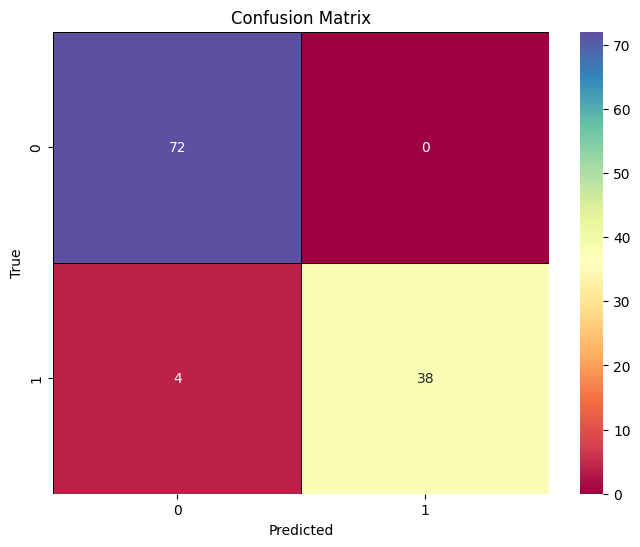

In [33]:
# Plot heatmap the confusion matrix

# Confusion Matrix
cm = confusion_matrix(list(y_test.astype(int)), list(y_pred.astype(int)))

# Color
custom_cmap = sns.color_palette("Spectral", as_cmap=True)

# Create the heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size
sns.heatmap(cm, annot=True, cmap=custom_cmap, fmt='d', linewidths=0.5, linecolor='black', cbar=True)

# Add labels and a title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [34]:
# Check accuracy
acc=accuracy_score(list(y_test.astype(int)), list(y_pred.astype(int)))
acc

0.9649122807017544

We see that only with the scaling of the features we reach a very good result with an accuracy of 96% and only 4 false negatives

In [35]:
# Plot the clasiffication report

cr = classification_report(list(y_test.astype(int)), list(y_pred.astype(int)))
print(cr)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



## Best Features Sklearn Model

Now we will select the best 6 features

In [36]:
# Creating SelectKBest instance with f_classif scoring function
selector = SelectKBest(score_func=f_classif, k=6)  # Selecting 6 best features

# Fit selector to the training data and transform both train and test data
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# Use these indices to extract selected features from X_train and X_test
X_train_selected = X_train.iloc[:, selected_features_indices]
X_test_selected = X_test.iloc[:, selected_features_indices]

# Creating the RandomForestClassifier model
clf = RandomForestClassifier(n_estimators=30, random_state=10, criterion='gini')

# Fitting the model on the selected features
clf.fit(X_train_selected, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test_selected)

In [37]:
acc=accuracy_score(list(y_test.astype(int)), list(y_pred.astype(int)))
acc

0.9473684210526315

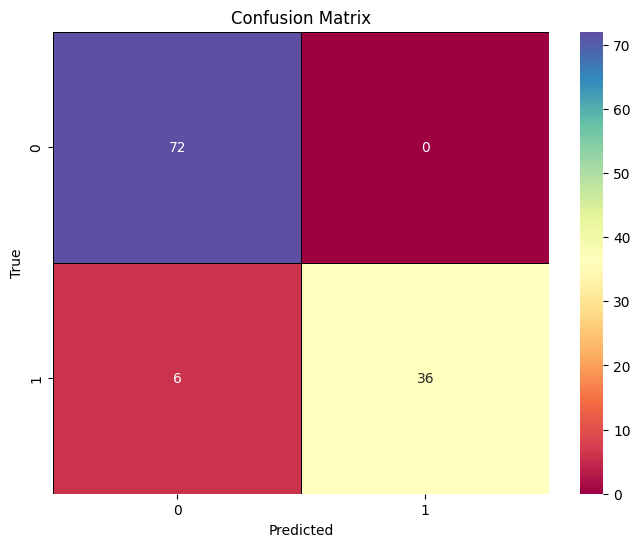

In [38]:
# Plot heatmap the confusion matrix

# Confusion MAtrix
cm = confusion_matrix(list(y_test.astype(int)), list(y_pred.astype(int)))

# Color
custom_cmap = sns.color_palette("Spectral", as_cmap=True)

# Create the heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size
sns.heatmap(cm, annot=True, cmap=custom_cmap, fmt='d', linewidths=0.5, linecolor='black', cbar=True)

# Add labels and a title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

We see that only the best 6 features we reach a very good result as well with an accuracy of 94% and only 6 false negatives

## Baseline Spark Model

In [39]:
# Pyspark
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.functions import col


In [40]:
## Check column "diagnosis" transformation to numerical feature

# Convert Pandas DataFrame to Spark DataFrame
spark = SparkSession.builder.appName("ScalingExample").getOrCreate()
data = spark.createDataFrame(df)

# Combine all feature columns
all_features = features_robust + features_standard + features_minmax

# Index the 'diagnosis' column
indexer = StringIndexer(inputCol="diagnosis", outputCol="label")
indexed_data = indexer.fit(data).transform(data)

# Display unique values in the 'label' column to verify transformation
indexed_data.select("label").distinct().show()

# Stop the Spark session
spark.stop()

+-----+
|label|
+-----+
|  0.0|
|  1.0|
+-----+



In [41]:
# Create a Spark session
spark = SparkSession.builder.appName("BreastCancerClassification").getOrCreate()

# Load your dataset
# data = spark.read.csv("/data/clean_df", header=True, inferSchema=True)
data = spark.createDataFrame(df)


# Combine your features into a single column
assembler = VectorAssembler(inputCols=features_robust + features_standard + features_minmax, outputCol="features")
data_assembled = assembler.transform(data)

# Index the 'diagnosis' column
indexer = StringIndexer(inputCol="diagnosis", outputCol="label")
indexed_data = indexer.fit(data_assembled).transform(data_assembled)

# Split the data into training and testing sets
(train_data, test_data) = indexed_data.randomSplit([0.7, 0.3], seed=42)

# Create a Random Forest Classifier
rf = RandomForestClassifier(labelCol="label", featuresCol="features")

# Train the model
model = rf.fit(train_data)

# Make predictions on the test set
predictions = model.transform(test_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)

# # Stop the Spark session
# spark.stop()


Accuracy: 0.9748427672955975


In [42]:
# Convert predictions to RDD for MulticlassMetrics
prediction_and_label = predictions.select("prediction", "label").rdd.map(lambda row: (float(row.prediction), float(row.label)))

# Create MulticlassMetrics object
metrics = MulticlassMetrics(prediction_and_label)

# Confusion Matrix
confusion_matrix = metrics.confusionMatrix()

print("Confusion Matrix:")
print(confusion_matrix)

# Overall statistics
print("\nOverall Statistics:")
print(f"Accuracy: {metrics.accuracy}")
print(f"Precision: {metrics.weightedPrecision}")
print(f"Recall: {metrics.weightedRecall}")
print(f"F1 Score: {metrics.weightedFMeasure()}")

# Statistics by class
labels = indexed_data.select("label").distinct().rdd.flatMap(lambda x: x).collect()
for label in sorted(labels):
    print(f"\nClass {int(label)} Statistics:")
    print(f"Precision: {metrics.precision(label)}")
    print(f"Recall: {metrics.recall(label)}")
    print(f"F1 Score: {metrics.fMeasure(label)}")


# Stop the Spark session
spark.stop()


Confusion Matrix:
DenseMatrix([[107.,   4.],
             [  0.,  48.]])

Overall Statistics:
Accuracy: 0.9748427672955975
Precision: 0.9767779390420899
Recall: 0.9748427672955975
F1 Score: 0.9751151116496453

Class 0 Statistics:
Precision: 1.0
Recall: 0.963963963963964
F1 Score: 0.9816513761467891

Class 1 Statistics:
Precision: 0.9230769230769231
Recall: 1.0
F1 Score: 0.9600000000000001


Using Spark, we see that only without scaling of the features we reach a very good result as well with an accuracy of 97% and only 4 false positives

## Best Features Spark Model

In [43]:
# Create a Spark session
spark = SparkSession.builder.appName("BreastCancerClassification").getOrCreate()

# Load your dataset
data = spark.createDataFrame(df)

# Combine your features into a single column
assembler = VectorAssembler(inputCols=features_robust + features_standard + features_minmax, outputCol="features")
data_assembled = assembler.transform(data)

# Define RandomForestClassifier
rf = RandomForestClassifier(labelCol="diagnosis", featuresCol="features")

# Train the RandomForestClassifier on the whole dataset
model = rf.fit(data_assembled)

# Get feature importances
importances = model.featureImportances

# Associate feature importances with feature names
all_feature_names = features_robust + features_standard + features_minmax
feature_importance_dict = dict(zip(all_feature_names, importances))

# Sort features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display sorted feature importances
for feature, importance in sorted_features:
    print(f"Feature: {feature}, Importance: {importance}")


Feature: perimeter_worst, Importance: 0.21411404853428576
Feature: concave points_worst, Importance: 0.14766348111550248
Feature: radius_worst, Importance: 0.13001859324517145
Feature: concavity_mean, Importance: 0.06815162812804162
Feature: area_mean, Importance: 0.06764763673825598
Feature: area_worst, Importance: 0.06394416308545145
Feature: concave points_mean, Importance: 0.04840183938013526
Feature: area_se, Importance: 0.04750929258046458
Feature: radius_se, Importance: 0.027050838763125556
Feature: texture_worst, Importance: 0.02627815719058101
Feature: perimeter_se, Importance: 0.021729452686714404
Feature: texture_mean, Importance: 0.017796168089107632
Feature: concavity_worst, Importance: 0.017761179494013728
Feature: radius_mean, Importance: 0.015252856107775135
Feature: symmetry_worst, Importance: 0.01037131003160818
Feature: compactness_worst, Importance: 0.010198271128991136
Feature: smoothness_mean, Importance: 0.0092744754877563
Feature: smoothness_worst, Importance: 0

In [44]:
# Assuming you've obtained the top 10 features from feature importance
top_features = ['area_worst', 'concave points_worst', 'perimeter_worst', 'radius_worst', 'concave points_mean',
                'area_mean', 'radius_se', 'texture_worst', 'area_se', 'concavity_mean']

# Combine selected features into a single column
assembler_selected = VectorAssembler(inputCols=top_features, outputCol="selected_features")
data_selected = assembler_selected.transform(data)

# Split the data into training and testing sets for the selected features
(train_data_selected, test_data_selected) = data_selected.randomSplit([0.7, 0.3], seed=42)

# Create a RandomForestClassifier
rf_selected = RandomForestClassifier(labelCol="diagnosis", featuresCol="selected_features")

# Train the model with selected features
model_selected = rf_selected.fit(train_data_selected)

# Make predictions on the test set with selected features
predictions_selected = model_selected.transform(test_data_selected)

# Evaluate the model with selected features
evaluator = MulticlassClassificationEvaluator(labelCol="diagnosis", predictionCol="prediction", metricName="accuracy")
accuracy_selected = evaluator.evaluate(predictions_selected)
print("Accuracy with selected features:", accuracy_selected)



Accuracy with selected features: 0.9308176100628931


In [45]:
# Convert predictions to RDD for MulticlassMetrics
prediction_and_label = predictions_selected.select("prediction", "diagnosis").rdd.map(lambda row: (float(row.prediction), float(row.diagnosis)))

# Create MulticlassMetrics object
metrics = MulticlassMetrics(prediction_and_label)

# Confusion Matrix
confusion_matrix = metrics.confusionMatrix()

print("Confusion Matrix:")
print(confusion_matrix)

# Overall statistics
print("\nOverall Statistics:")
print(f"Accuracy: {metrics.accuracy}")
print(f"Precision: {metrics.weightedPrecision}")
print(f"Recall: {metrics.weightedRecall}")
print(f"F1 Score: {metrics.weightedFMeasure()}")

# Statistics by class
labels = data_selected.select("diagnosis").distinct().rdd.flatMap(lambda x: x).collect()
for label in sorted(labels):
    if isinstance(label, str):
        label = float(label)

    precision = metrics.precision(label)
    recall = metrics.recall(label)
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    print(f"\nClass {int(label)} Statistics:")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1_score}")


# Stop the Spark session
spark.stop()

Confusion Matrix:
DenseMatrix([[102.,   9.],
             [  2.,  46.]])

Overall Statistics:
Accuracy: 0.9308176100628931
Precision: 0.9371750890618815
Recall: 0.9308176100628931
F1 Score: 0.9320422430209127

Class 0 Statistics:
Precision: 0.9807692307692307
Recall: 0.918918918918919
F1 Score: 0.9488372093023255

Class 1 Statistics:
Precision: 0.8363636363636363
Recall: 0.9583333333333334
F1 Score: 0.8932038834951457


Using Spark, we see that only with the best 10 features we reach a very good result as well with an accuracy of 93% and only 9 false positives and 2 false negatives

In general, feature engineering models compare with the baseline model shows that similar results can be achieved. Also, the classification algorithm with sklearn and spark perform very well. Other possibilities in order to impprove the results could be, changing the scaling strategy or the number of